Лабораторная работа 2. **Рекуррентные диаграммы**


In [6]:
#%pip install pyts

In [7]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import networkx as nx

### 1. 
Постройте для временного ряда логарифмических доходностей SBER рекуррентную диаграмму. 


In [149]:
import pickle

file = open("returns_SBER_3.pickle", 'rb')
df = pickle.load(file)
ts = np.array(df)
ts.min()

-3.180264895332978

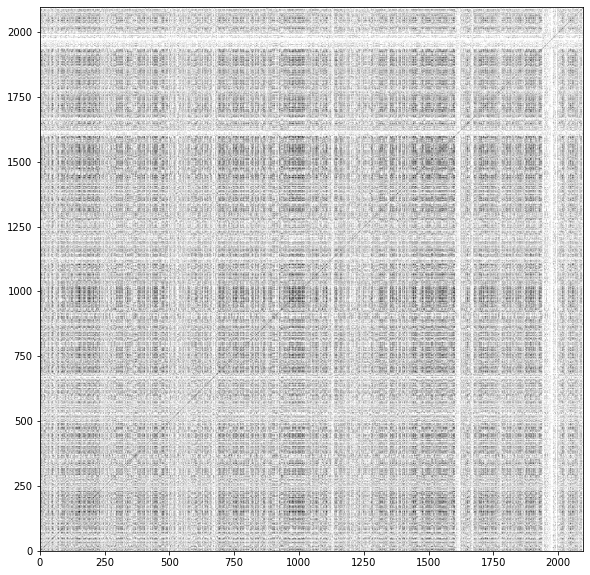

In [150]:
from pyts.image import RecurrencePlot
from mpl_toolkits.axes_grid1 import ImageGrid

rp = RecurrencePlot(threshold='point', percentage=20)
X = np.array([ts])
X_rp = rp.fit_transform(X)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(X_rp[0], cmap='binary', origin='lower')

То же самое, но на 1 год:

**Примечание:** далее для наглядности будем использовать данные на 1 год

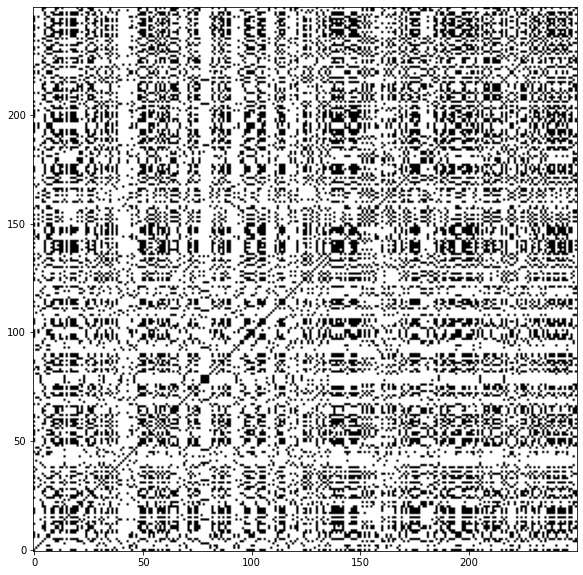

In [176]:
start_day = 1300
year = 250
rp = RecurrencePlot(threshold='point', percentage=30)
ts_one_year = ts[start_day:start_day+year]
X = np.array([ts_one_year])
X_rp_one_year = rp.fit_transform(X)[0]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(X_rp_one_year,  cmap='binary',  origin='lower')

### 2.
Отобразите рекуррентную диаграмму в матрицу смежности и постройте  граф. 


In [165]:
adj_mat=ig.adjacency.Matrix(X_rp_one_year)
print(adj_mat.shape)
print(type(adj_mat))

(250, 250)
<class 'igraph.datatypes.Matrix'>


In [203]:
g2=ig.Graph.Adjacency(np.array(adj_mat.data))
g_nx=nx.from_numpy_matrix(np.array(X_rp_one_year))
# nx.draw(g_nx, node_size=20, font_size=3)

In [177]:
g = ig.Graph.Adjacency(X_rp_one_year)

<AxesSubplot:>

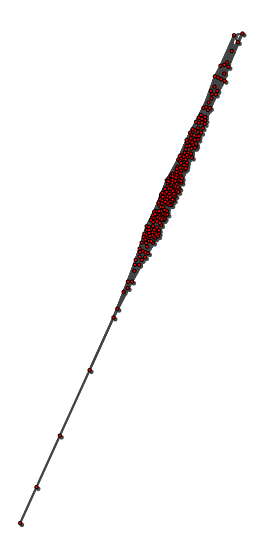

In [178]:
fig, ax = plt.subplots(figsize=(10,10))
ig.plot(g, 
    target=ax)

<AxesSubplot:>

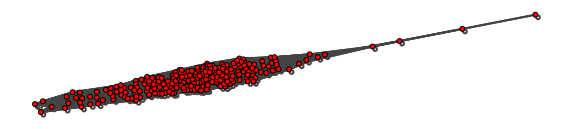

In [167]:
fig, ax = plt.subplots(figsize=(10,10))
ig.plot(g2, 
    target=ax)

### 3.
Повторите вычисления спектральных и топологических характеристик для полученного графа из предыдущей работы

In [179]:
file = open("characteristics_SBER_GAZP_GMKN.pickle", 'rb')
df_characteristics = pickle.load(file)
file.close()

In [213]:
g_networkx = g.to_networkx()
df_characteristics.loc['New_Graph', 'диаметр'] = g.diameter()
df_characteristics.loc['New_Graph', 'радиус'] = g.radius()
df_characteristics.loc['New_Graph', 'плотность'] =  g.density()
df_characteristics.loc['New_Graph', 'транзитивность'] = nx.transitivity(g_networkx)
#df_characteristics.loc[ticker, 'спектр'] = nx.spectrum.adjacency_spectrum(g_networkx)
df_characteristics.loc['New_Graph', 'средняя степень вершин'] = np.mean(list(g.degree()))
print(f'Центр : {nx.center(g_networkx)}')
print(f'Периферийные вершины : {nx.periphery(g_networkx)}')

Центр : [0, 6, 7, 8, 24, 29, 33, 36, 45, 53, 54, 55, 57, 61, 83, 86, 98, 99, 100, 101, 105, 112, 124, 127, 131, 134, 136, 143, 145, 149, 150, 152, 154, 157, 168, 171, 175, 181, 184, 189, 194, 195, 196, 201, 202, 204, 206, 210, 219, 220, 228, 230, 231, 234, 236, 240, 243, 245]
Периферийные вершины : [16, 68, 107, 116, 122]


In [183]:
df_characteristics.loc[:, df_characteristics.columns != 'спектр'].apply(pd.to_numeric).style.background_gradient(cmap='Blues')

,диаметр,радиус,плотность,транзитивность,средняя степень вершин
SBER,9,5,0.002680,0.308566,6.247856
GAZP,9,5,0.003105,0.314694,6.315479
GMKN,10,5,0.003107,0.329922,6.320393
New_Graph,13,7,0.301205,0.767435,150.000000


In [1]:
import pickle

file = open("characteristics_from_2.pickle", 'wb')
pickle.dump(df_characteristics, file)
file.close()

NameError: name 'df_characteristics' is not defined

### 4.
Пользуясь матричной теоремой Киргофа установите сколько существует покрывающих деревьев для полученного графа.

In [217]:
# First, construct the Laplacian matrix Q for the example diamond graph G (see image on the right):
# Next, construct a matrix Q* by deleting any row and any column from Q. For example, deleting row 1 and column 1 yields
# Finally, take the determinant of Q* to obtain t(G), which is 8 for the diamond graph.
#  (Notice t(G) is the (1,1)-cofactor of Q in this example.)

Q=nx.laplacian_matrix(g_nx)
Q_star = Q[1:, 1:].toarray()
np.linalg.det(Q_star)

inf

In [218]:
Q=np.array(g.laplacian())
Q_star=Q[1:, 1:]
np.linalg.det(Q_star)

inf

In [219]:
np.count_nonzero(Q)

18750

### Tutorials & Sandbox


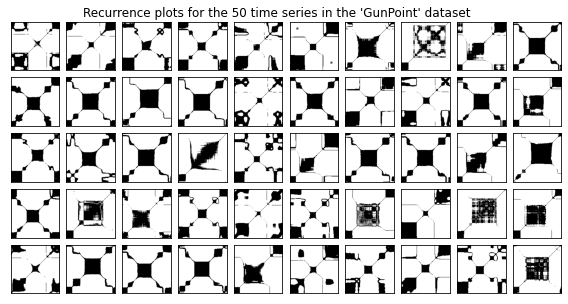

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

# Load the GunPoint dataset
X, _, _, _ = load_gunpoint(return_X_y=True)

# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

# Plot the 50 recurrence plots
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True)
for i, ax in enumerate(grid):
    ax.imshow(X_rp[i], cmap='binary', origin='lower')
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

fig.suptitle(
    "Recurrence plots for the 50 time series in the 'GunPoint' dataset",
    y=0.92
)

plt.show()

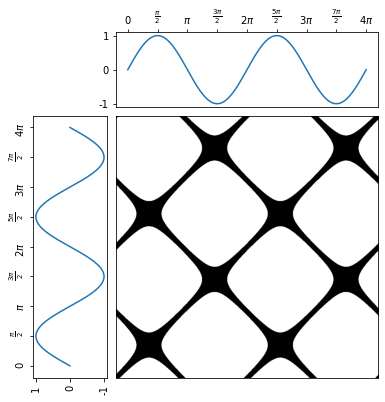

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Recurrence plot transformation
rp = RecurrencePlot(threshold=np.pi/18)
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()

# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

In [32]:
x.shape

(1000,)